In [1]:
# Place CSV files containing unique sequences for each dataset as shown below.
avida_hil6_seq_file = "./avida-hil6_binder_seqs.csv"
sabdab_nano_seq_file = "./sabdab_nano_binder_seqs.csv"
sdab_db_seq_file = "./sdab-db_binder_seqs.csv"

## Calculate pairwise sequence identities

In [2]:
import os
import warnings
warnings.filterwarnings("ignore")
from Bio import pairwise2
from Bio.Seq import Seq
import numpy as np
import pandas as pd
import itertools
from tqdm import tqdm
import matplotlib.pyplot as plt

SEED=123
N_SAMPLE=700
np.random.seed(SEED)

def pairwise_identity(seq_list, n_sample):
    seq_list = np.random.choice(seq_list, n_sample, replace=False)
    identity_list = []
    for comb in itertools.combinations(seq_list, 2):
        alignments = pairwise2.align.globalxx(comb[0], comb[1])
        identity = alignments[0][2] / alignments[0][4]
        identity_list.append(identity)
    return (np.array(identity_list))

In [3]:
# AVIDa-hIL6
seq_list = pd.read_csv(avida_hil6_seq_file, header=None)[0].values
print(len(seq_list))
identity_list = pairwise_identity(seq_list, N_SAMPLE)
np.save("avida-hil6_seq_identities.npy", identity_list)

4425


In [4]:
# SAbDab-nano
seq_list = pd.read_csv(sabdab_nano_seq_file, header=None)[0].values
print(len(seq_list))
identity_list = pairwise_identity(seq_list, N_SAMPLE)
np.save("sabdab_nano_seq_identities.npy", identity_list)

828


In [5]:
# sdAb-DB
seq_list = pd.read_csv(sdab_db_seq_file, header=None)[0].values
print(len(seq_list))
identity_list = pairwise_identity(seq_list, N_SAMPLE)
np.save("sdab_db_seq_identities.npy", identity_list)

1414


## Visualization

In [6]:
# Setting of matplotlib
plt.rcParams['font.size'] = 8
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.2
plt.rcParams['ytick.major.width'] = 1.2
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['axes.grid']=True
plt.rcParams["axes.edgecolor"] = 'black'
plt.rcParams['grid.linestyle']='--'
plt.rcParams['grid.linewidth'] = 0.3
plt.rcParams["legend.markerscale"] = 2
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = 'black'

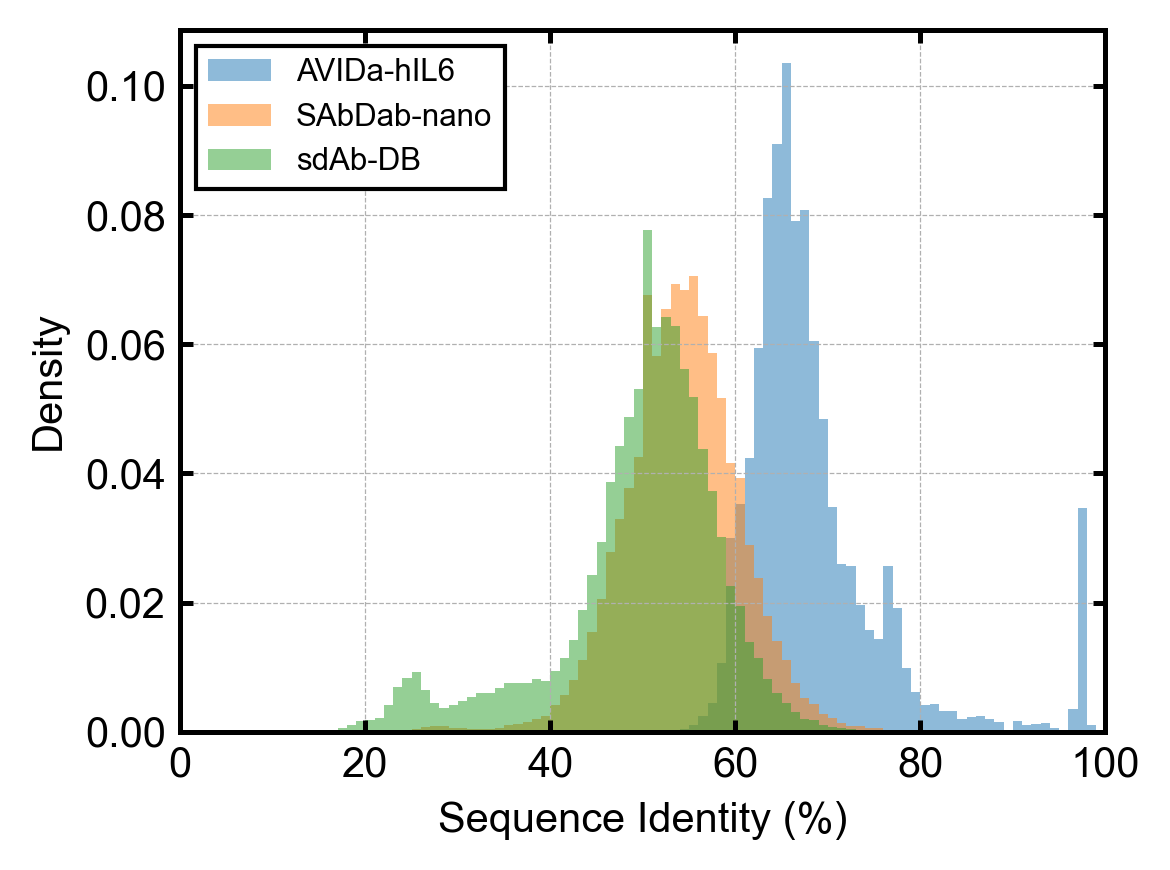

In [7]:
avida_hil6 = np.load("avida-hil6_seq_identities.npy") * 100
sabdab_nano = np.load("sabdab_nano_seq_identities.npy") * 100
sdab_db = np.load("sdab_db_seq_identities.npy") * 100

ALPHA=0.5
DENSITY=True
BINS=100

fig = plt.figure(figsize=(4,3),dpi=300,facecolor='w',edgecolor='k')
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.set_xlim(0, 100)
ax.set_xlabel("Sequence Identity (%)")
ax.set_ylabel("Density")
plt.hist(avida_hil6, bins=BINS, range=(0, 100), alpha=ALPHA, label="AVIDa-hIL6", density=DENSITY)
plt.hist(sabdab_nano, bins=BINS, range=(0, 100), alpha=ALPHA, label="SAbDab-nano", density=DENSITY)
plt.hist(sdab_db, bins=BINS, range=(0, 100), alpha=ALPHA, label="sdAb-DB", density=DENSITY)
plt.tight_layout()
plt.legend(fontsize=7.5)
plt.show()

In [8]:
fig.savefig("identity_distribution.png")